In [155]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from homography import apply_homography, apply_homography_2, apply_homography_3, assign_squares

### Read Image

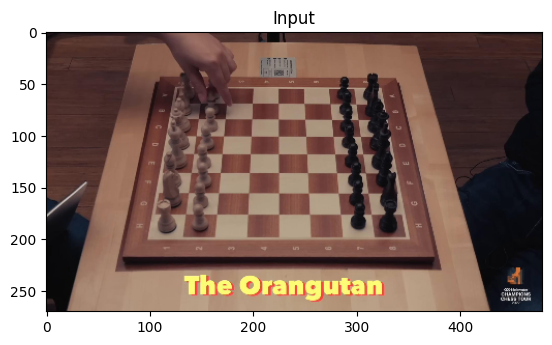

In [156]:
chessboard = (3, 7)
img = cv2.imread("../images/886_png_jpg.rf.e9d182d612a665e0bf316c48960f2f78.jpg")
img = cv2.resize(img, None, fx=0.25, fy=0.25)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Input')
plt.show()

### Convert to Grayscale

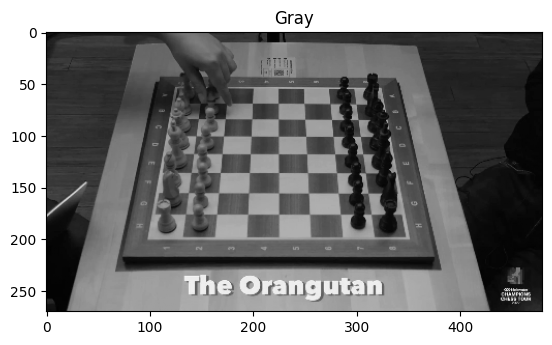

In [157]:
height, width, _ = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imwrite('fcbc/2.jpg', gray)

plt.imshow(gray, cmap = "gray")
plt.title('Gray')
plt.show()

### Show 6x6 Grid

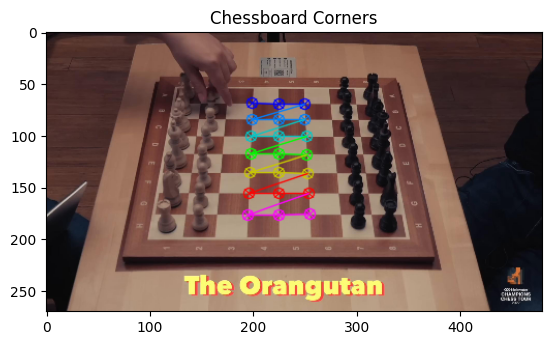

In [158]:
ret, corners = cv2.findChessboardCorners(gray, chessboard, cv2.CALIB_CB_FILTER_QUADS)
img2 = img.copy()
img2 = cv2.drawChessboardCorners(img2, chessboard, corners, ret)

plt.imshow(img2)
plt.title('Chessboard Corners')
plt.show()

## Read and Draw Corner Points

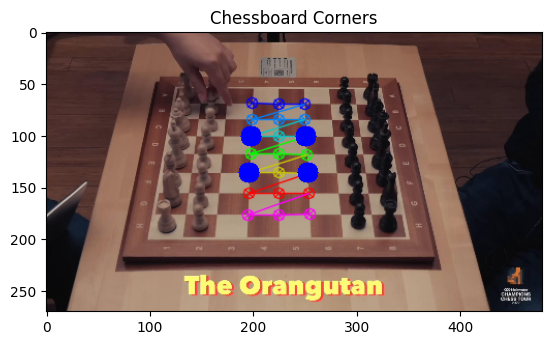

In [159]:
top_left = corners[6][0]
top_right = corners[8][0]
bottom_left = corners[12][0]
bottom_right = corners[14][0]
  
cv2.circle(img2, (int(top_left[0]), int(top_left[1])), 10, (0, 0, 255), -1)
cv2.circle(img2, (int(top_right[0]), int(top_right[1])), 10, (0, 0, 255), -1)
cv2.circle(img2, (int(bottom_left[0]), int(bottom_left[1])), 10, (0, 0, 255), -1)
cv2.circle(img2, (int(bottom_right[0]), int(bottom_right[1])), 10, (0, 0, 255), -1)

img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
cv2.imwrite('fcbc/4.jpg', img2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.title('Chessboard Corners')
plt.show()

### Apply Homography

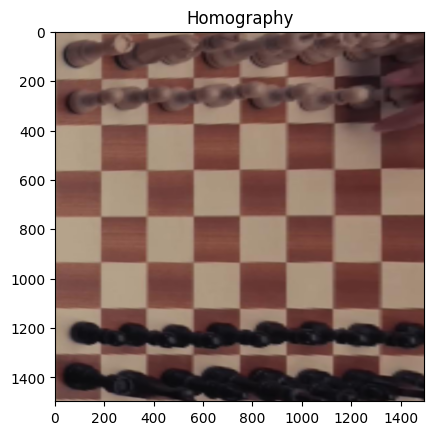

In [160]:
pts_1 = np.array([
    bottom_left,
    top_left,
    bottom_right,
    top_right,
], dtype=np.float32)

height, width, _ = img.shape
img_size = (height+width)//2
pts_2 = np.float32([[0, 0], [img_size, 0], [0, img_size], [img_size, img_size]])

# calculate matrix based on mapping pts_1 to pts_2
M = cv2.getPerspectiveTransform(pts_1, pts_2)
tx, ty = (img_size//2)*3, (img_size//2)*3
T = np.array([[1, 0, tx],
                [0, 1, ty],
                [0, 0, 1]], dtype=np.float32)


# combine homography with translation
M = T @ M

# apply homography
img_size = img_size+((img_size//2)*6)
dst = cv2.warpPerspective(img, M, (img_size, img_size))

plt.imshow(dst)
plt.title('Homography')
plt.show()

[[[ 98.895355 198.92769 ]]

 [[348.9801   198.32806 ]]

 [[127.61259   55.60826 ]]

 [[321.7312    56.560986]]]


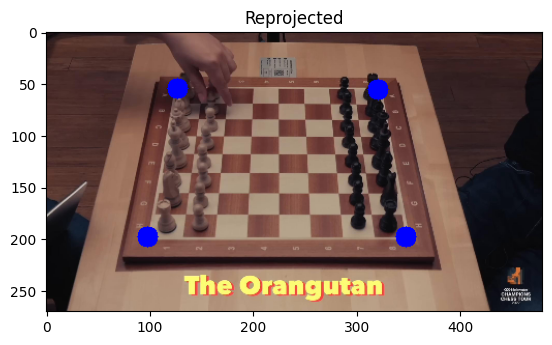

In [161]:
pts_warped = np.float32([
    [0, 0],
    [0, img_size],
    [img_size, 0],
    [img_size, img_size]
]).reshape(-1, 1, 2)

# inverse homography
M_inv = np.linalg.inv(M)

# reproject the points
pts_back = cv2.perspectiveTransform(pts_warped, M_inv)

print(pts_back)

top_left = pts_back[0][0]
top_right = pts_back[1][0]
bottom_left = pts_back[2][0]
bottom_right = pts_back[3][0]

img2 = img.copy()

cv2.circle(img2, (int(top_left[0]), int(top_left[1])), 10, (0, 0, 255), -1)
cv2.circle(img2, (int(top_right[0]), int(top_right[1])), 10, (0, 0, 255), -1)
cv2.circle(img2, (int(bottom_left[0]), int(bottom_left[1])), 10, (0, 0, 255), -1)
cv2.circle(img2, (int(bottom_right[0]), int(bottom_right[1])), 10, (0, 0, 255), -1)


plt.imshow(img2)
plt.title('Reprojected')
plt.show()